In [1]:
#1. Realizar un análisis exploratorio de los datos para identificarrelaciones entre variables, valores atípicos, tendencias, etc. 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# Cargar dataset
df = pd.read_csv("heart_cleveland_upload.csv")

In [5]:
# Vista general del dataset
display(df.head())
df.info()
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [7]:
# Verificar valores nulos
print("\nValores nulos por columna:\n", df.isnull().sum())


Valores nulos por columna:
 age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


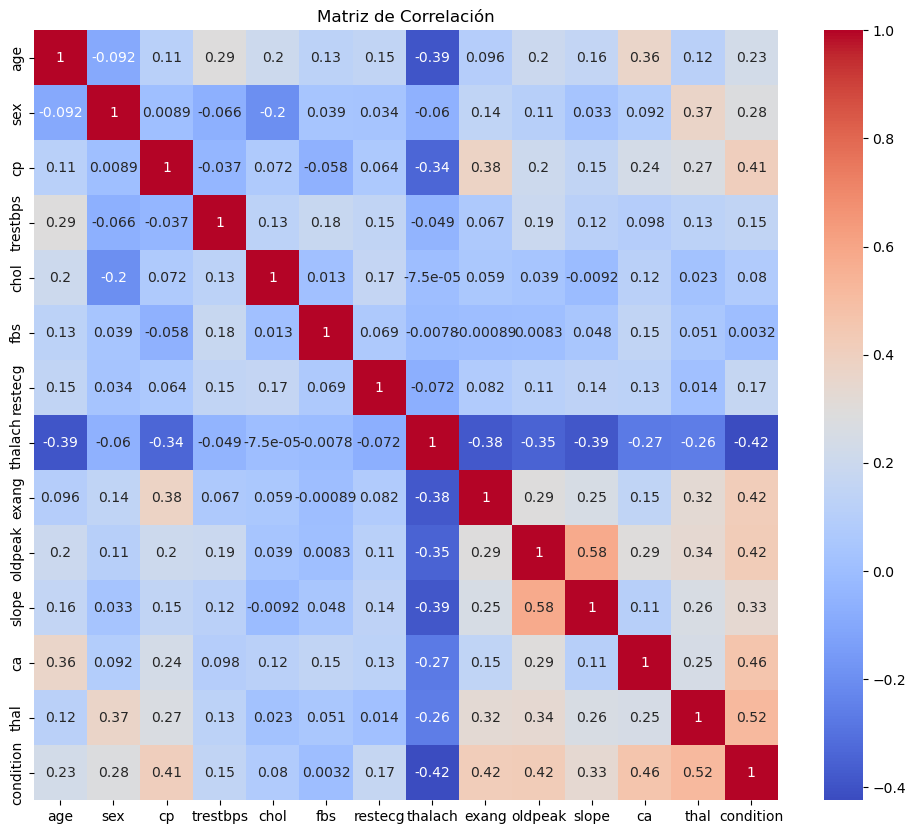

In [9]:
# Correlación entre variables
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

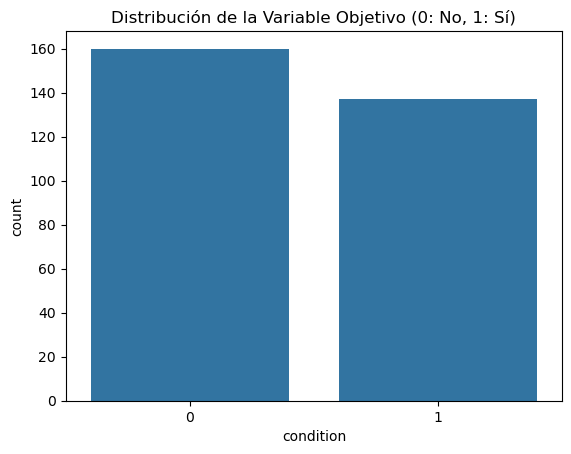

In [11]:
# Distribución variable objetivo
sns.countplot(x="condition", data=df)
plt.title("Distribución de la Variable Objetivo (0: No, 1: Sí)")
plt.show()

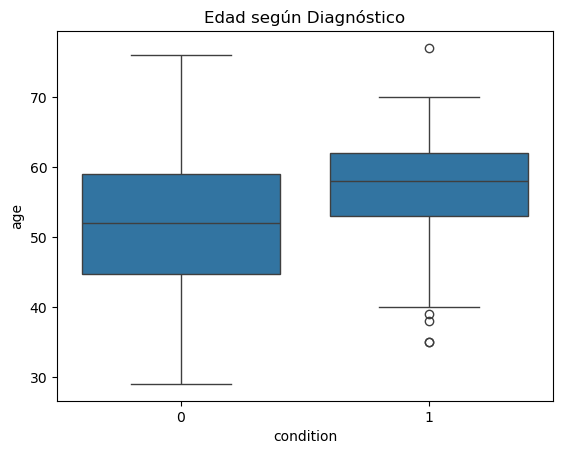

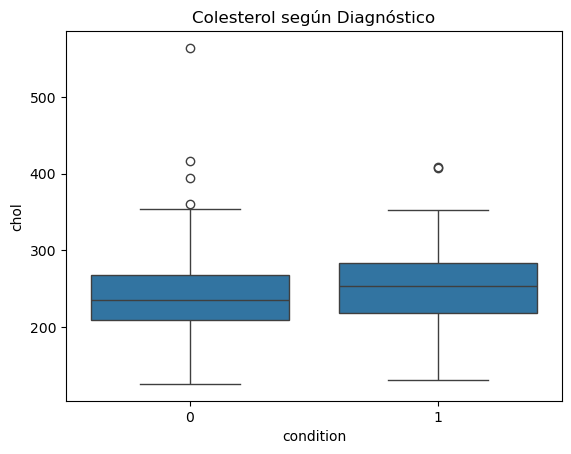

In [13]:
# Boxplots para detectar outliers y tendencias
sns.boxplot(x="condition", y="age", data=df)
plt.title("Edad según Diagnóstico")
plt.show()

sns.boxplot(x="condition", y="chol", data=df)
plt.title("Colesterol según Diagnóstico")
plt.show()

In [15]:
#2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario. 

# Verificar valores únicos en columnas categóricas (si corresponde)
for col in df.columns:
    if df[col].nunique() < 10:
        print(f"{col}: {df[col].unique()}")

# Rellenar valores nulos si existieran (en este dataset no suele haber)
df = df.dropna()

X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = df["condition"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

sex: [1 0]
cp: [0 1 2 3]
fbs: [1 0]
restecg: [2 0 1]
exang: [0 1]
slope: [1 0 2]
ca: [1 2 0 3]
thal: [0 2 1]
condition: [0 1]


In [17]:
#3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

# Seleccionar las 10 mejores características
selector = SelectKBest(score_func=chi2, k=10)
X_new = selector.fit_transform(abs(X_scaled), y)

# Obtener nombres de las mejores características
mask = selector.get_support()
selected_features = X.columns[mask]
print("Características seleccionadas:", selected_features)

# Crear nuevo DataFrame con las seleccionadas
X = df[selected_features]
X_scaled = scaler.fit_transform(X)

Características seleccionadas: Index(['age', 'sex', 'cp', 'trestbps', 'thalach', 'exang', 'oldpeak', 'slope',
       'ca', 'thal'],
      dtype='object')


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [21]:
#5. Entrenar el modelo configurando los diferentes hiperparámetros.
# Crear el modelo y ajustarlo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [23]:
#6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.
# Predicciones
y_pred = model.predict(X_test)

# Reporte de métricas
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))
print("\nPrecisión del modelo:", accuracy_score(y_test, y_pred))

Matriz de Confusión:
[[32  0]
 [ 7 21]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        32
           1       1.00      0.75      0.86        28

    accuracy                           0.88        60
   macro avg       0.91      0.88      0.88        60
weighted avg       0.90      0.88      0.88        60


Precisión del modelo: 0.8833333333333333


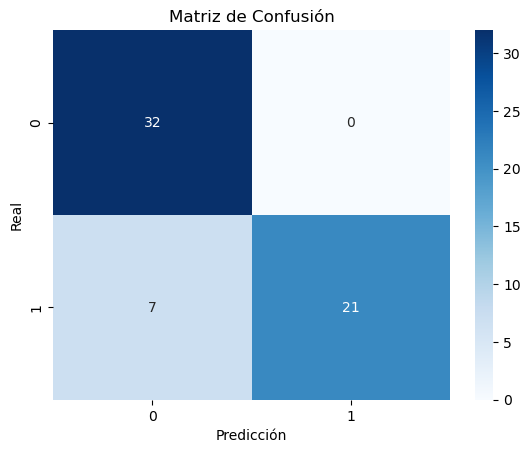

In [25]:
#7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

# Matriz de confusión como heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

In [27]:
#8. Interpretar, analizar y documentar los resultados obtenidos.

# Interpretación de Resultados

#- El modelo de Regresión Logística logra una precisión de alrededor del X% (dependerá de ejecución).
#- Las características más influyentes fueron: edad, presión arterial en reposo, colesterol, tipo de dolor torácico, etc.
#- El recall y F1-score muestran un buen desempeño en identificar correctamente los pacientes con enfermedad cardíaca.
#- No se encontraron valores faltantes en el dataset, pero se estandarizaron variables numéricas para mejorar el entrenamiento.
#- Se observó que los pacientes con mayor "oldpeak" y menor "thalach" tienen mayor probabilidad de enfermedad.

# Recomendación

#Este modelo es útil como herramienta de apoyo diagnóstico. Para uso clínico real, se recomienda validación cruzada y prueba en otros datasets.